In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_excel('/kaggle/input/eth-data/processed_data.xlsx')
df = df.reset_index(drop=True) # Reset the index

In [2]:
# Chia train test validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1) #x_train chứa các chỉ số, là biến độc lập
y_train = np.array(train_data['Close']) #y_train chứa gtr Close, là biến phụ thuộc

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [4]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(x_val)

In [5]:
# 7. Tính RMSE: Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_squared_error, mean_absolute_error

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Calculate MSE
valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

# Tính MAE cho validate và test
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))

# Tính MAPE cho validate và test
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1388.3209809950001
Testing RMSE: 1825.9570494806298
Validation MSE: 1927435.1462709194
Testing MSE: 3334119.146548007
Validation MAE: 1303.522773093263
Testing MAE: 1812.4001731927065
Validation MAPE: 50.42585157548386
Testing MAPE: 111.81598026494513


<h2> 30 days

In [6]:
last_index = df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
# Tạo mảng numpy chứa các ngày dự đoán tương ứng
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

# Dự đoán giá đóng cửa (Close) cho các khoảng thời gian tương ứng
y_next_30_days = model.predict(x_next_30_days)

# In ra giá đóng cửa dự đoán cho các khoảng thời gian
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[4423.00114123 4425.44938324 4427.89762525 4430.34586726 4432.79410927
 4435.24235128 4437.69059329 4440.1388353  4442.58707731 4445.03531932
 4447.48356133 4449.93180334 4452.38004535 4454.82828736 4457.27652937
 4459.72477138 4462.17301339 4464.6212554  4467.06949741 4469.51773942
 4471.96598143 4474.41422344 4476.86246545 4479.31070746 4481.75894947
 4484.20719148 4486.65543349 4489.1036755  4491.55191752 4494.00015953]


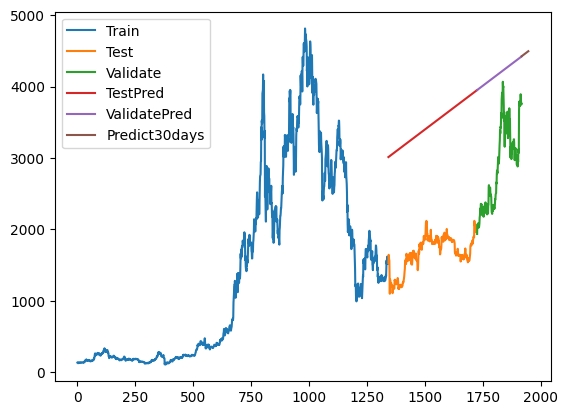

In [7]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train','Test','Validate','TestPred','ValidatePred','Predict30days'])
plt.show()

<h2> 60 days

In [8]:
last_index = df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
# Tạo mảng numpy chứa các ngày dự đoán tương ứng
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)

# Dự đoán giá đóng cửa (Close) cho các khoảng thời gian tương ứng
y_next_60_days = model.predict(x_next_60_days)

# In ra giá đóng cửa dự đoán cho các khoảng thời gian
print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[4423.00114123 4425.44938324 4427.89762525 4430.34586726 4432.79410927
 4435.24235128 4437.69059329 4440.1388353  4442.58707731 4445.03531932
 4447.48356133 4449.93180334 4452.38004535 4454.82828736 4457.27652937
 4459.72477138 4462.17301339 4464.6212554  4467.06949741 4469.51773942
 4471.96598143 4474.41422344 4476.86246545 4479.31070746 4481.75894947
 4484.20719148 4486.65543349 4489.1036755  4491.55191752 4494.00015953
 4496.44840154 4498.89664355 4501.34488556 4503.79312757 4506.24136958
 4508.68961159 4511.1378536  4513.58609561 4516.03433762 4518.48257963
 4520.93082164 4523.37906365 4525.82730566 4528.27554767 4530.72378968
 4533.17203169 4535.6202737  4538.06851571 4540.51675772 4542.96499973
 4545.41324174 4547.86148375 4550.30972576 4552.75796777 4555.20620978
 4557.65445179 4560.1026938  4562.55093581 4564.99917782 4567.44741983]


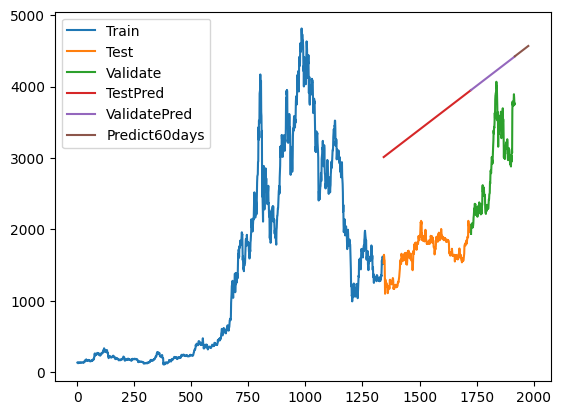

In [9]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train','Test','Validate','TestPred','ValidatePred','Predict60days'])
plt.show()

<h2> 90 days

In [10]:
last_index = df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
# Tạo mảng numpy chứa các ngày dự đoán tương ứng
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

# Dự đoán giá đóng cửa (Close) cho các khoảng thời gian tương ứng
y_next_90_days = model.predict(x_next_90_days)

print('\nPredicted closing prices for the next 90 days:')
print(y_next_90_days)


Predicted closing prices for the next 90 days:
[4423.00114123 4425.44938324 4427.89762525 4430.34586726 4432.79410927
 4435.24235128 4437.69059329 4440.1388353  4442.58707731 4445.03531932
 4447.48356133 4449.93180334 4452.38004535 4454.82828736 4457.27652937
 4459.72477138 4462.17301339 4464.6212554  4467.06949741 4469.51773942
 4471.96598143 4474.41422344 4476.86246545 4479.31070746 4481.75894947
 4484.20719148 4486.65543349 4489.1036755  4491.55191752 4494.00015953
 4496.44840154 4498.89664355 4501.34488556 4503.79312757 4506.24136958
 4508.68961159 4511.1378536  4513.58609561 4516.03433762 4518.48257963
 4520.93082164 4523.37906365 4525.82730566 4528.27554767 4530.72378968
 4533.17203169 4535.6202737  4538.06851571 4540.51675772 4542.96499973
 4545.41324174 4547.86148375 4550.30972576 4552.75796777 4555.20620978
 4557.65445179 4560.1026938  4562.55093581 4564.99917782 4567.44741983
 4569.89566184 4572.34390385 4574.79214586 4577.24038787 4579.68862988
 4582.13687189 4584.5851139  

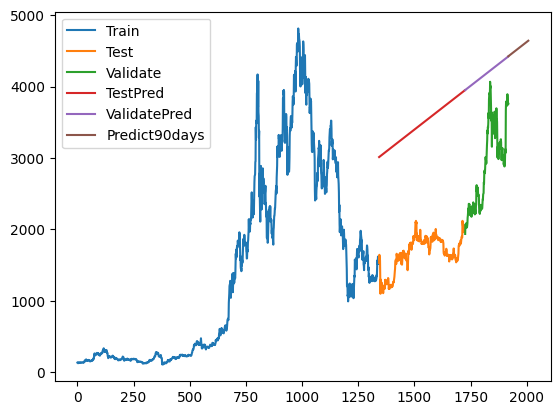

In [11]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train','Test','Validate','TestPred','ValidatePred','Predict90days'])
plt.show()